<a href="https://colab.research.google.com/github/ikramyoumba1/DataVisualisation-TP2025/blob/main/tp3_DataVisualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Metro_Interstate_Traffic_Volume.csv", parse_dates=["date_time"])


In [ ]:
print("Rows, Cols:", df.shape)
display(df.head())
print(df.info())
display(df.describe(include='all'))

Rows, Cols: (48204, 9)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              61 non-null     object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB
None


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,61,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,11,NaN,NaN,NaN,NaN,11,38,NaN,NaN
top,Labor Day,NaN,NaN,NaN,NaN,Clouds,sky is clear,NaN,NaN
freq,7,NaN,NaN,NaN,NaN,15164,11665,NaN,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,2016-01-05 10:46:16.773711616,3259.818355
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,2012-10-02 09:00:00,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,2014-02-06 11:45:00,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,2016-06-11 03:30:00,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,2017-08-11 06:00:00,4933.000000
max,NaN,310.070000,9831.300000,0.510000,100.000000,NaN,NaN,2018-09-30 23:00:00,7280.000000


**Non-Graphical EDA**

In [ ]:

tv = df["traffic_volume"].dropna()

mean_tv = tv.mean()
median_tv = tv.median()
mode_tv = tv.mode().iloc[0] if not tv.mode().empty else np.nan
std_tv = tv.std()
min_tv = tv.min()
max_tv = tv.max()
range_tv = max_tv - min_tv
skew_tv = tv.skew()
kurt_tv = tv.kurtosis()

print(f"Mean: {mean_tv:.2f}")
print(f"Median: {median_tv:.2f}")
print(f"Mode: {mode_tv}")
print(f"Std: {std_tv:.2f}")
print(f"Range: {range_tv}")
print(f"Skewness: {skew_tv:.3f}")
print(f"Kurtosis (excess): {kurt_tv:.3f}")


Mean: 3259.82
Median: 3380.00
Mode: 353
Std: 1986.86
Range: 7280
Skewness: -0.089
Kurtosis (excess): -1.309


إذا كان الوسيط اكبر من  المتوسط  هذا يشير إلى توزيع منحرف لليسار.

الفرق بين الوسيط والمتوسط يدل على وجود قيم متطرفة تؤثر على المتوسط.


In [ ]:
group_weather = df.groupby("weather_main")["traffic_volume"].agg(["mean","std","count"]).sort_values("mean", ascending=False)
display(group_weather)


,mean,std,count
weather_main,,,
Clouds,3618.449749,1906.202879,15164
Haze,3502.101471,1873.511057,1360
Rain,3317.905501,1982.228705,5672
Drizzle,3290.727073,1997.901830,1821
Smoke,3237.650000,1978.015893,20
Clear,3055.908819,1987.101411,13391
Snow,3016.844228,1900.185883,2876
Thunderstorm,3001.620890,1988.296012,1034
Mist,2932.956639,2073.025670,5950


**Task C: Multivariate Analysis via Grouping**

The weather condition associated with the highest average traffic is Clouds.

The road condition with the highest variance is Thunderstorm.

**Graphical EDA**

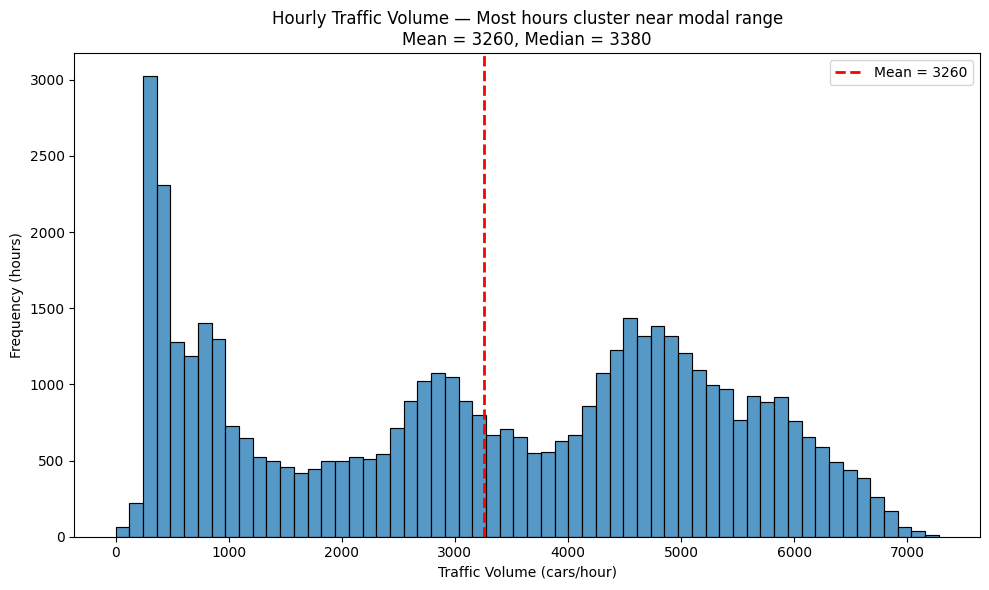

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(tv, bins=60, kde=False)
plt.axvline(mean_tv, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean_tv:.0f}")
plt.title(f"Hourly Traffic Volume — Most hours cluster near modal range\nMean = {mean_tv:.0f}, Median = {median_tv:.0f}")
plt.xlabel("Traffic Volume (cars/hour)")
plt.ylabel("Frequency (hours)")
plt.legend()
plt.tight_layout()
plt.show()


**B. Box plot and calculating IQR:**


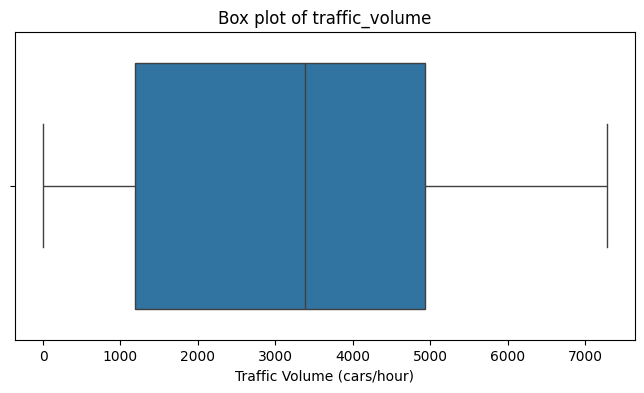

Q1=1193.0, Q3=4933.0, IQR=3740.0


In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=tv)
plt.title("Box plot of traffic_volume")
plt.xlabel("Traffic Volume (cars/hour)")
plt.show()

# حساب IQR
Q1 = tv.quantile(0.25)
Q3 = tv.quantile(0.75)
IQR = Q3 - Q1
print(f"Q1={Q1}, Q3={Q3}, IQR={IQR}")


.Interquartile range (IQR) measures the variation in the middle of the distribution (the middle 50% of the data)

.The IQR is smaller than the overall range, indicating that outliers increase the overall variance.

**C. Grouped box plots by holiday (Comparison of holidays vs regular days)**

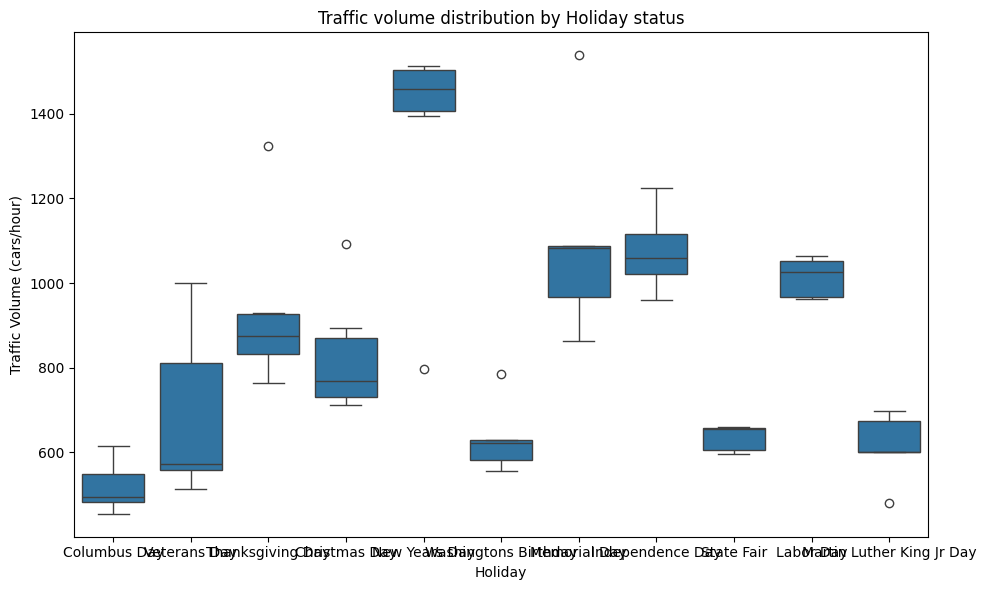

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="holiday", y="traffic_volume", data=df)
plt.title("Traffic volume distribution by Holiday status")
plt.xlabel("Holiday")
plt.ylabel("Traffic Volume (cars/hour)")
plt.tight_layout()
plt.show()


**Note:**

.Yes, there is a big difference in distribution between regular days and holidays.

.Ordinary days have a higher mean and lower variance compared to holidays

**Correlation Matrix and Heatmap**

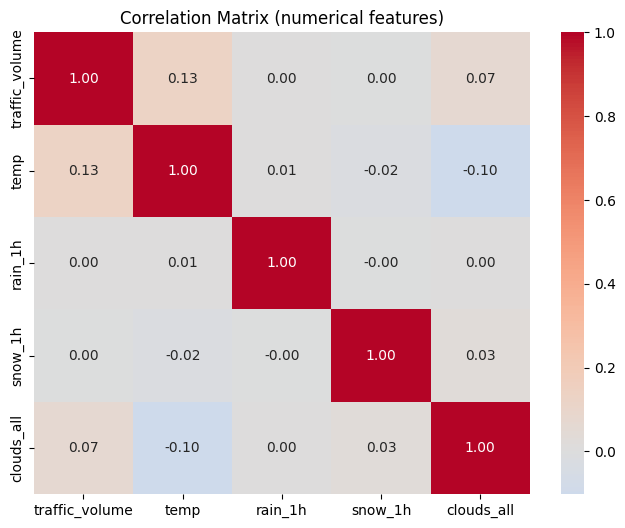

In [ ]:
num_cols = ["traffic_volume","temp","rain_1h","snow_1h","clouds_all"]
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix (numerical features)")
plt.show()


**Task A: Correlation Matrix and Heatmap**

1_In the summer (high heat), people may reduce driving during the hot peak hours.

2_The causality paradox:

.People are on vacation and may travel out of town.
.Using alternative means of transportation: In good weather, people may prefer walking or cycling.

.Peak hours: traffic is usually higher in the morning and evening when the temperature is moderate.

In [ ]:
import plotly.express as px
fig = px.scatter(df.sample(5000, random_state=1), x="temp", y="traffic_volume",
                 hover_data=["weather_description","date_time","holiday"],
                 title="Traffic Volume vs Temperature (sampled points)")
fig.update_layout(xaxis_title="Temp (Kelvin)", yaxis_title="Traffic Volume (cars/hour)")
fig.show()
